In [1]:
## self attempt at t-sne to visualize personalities

In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np

In [21]:
orig = pd.read_csv('../Datasets/personality_classification.csv',
                   index_col=0, sep=',', encoding='cp1252')
print(orig.shape)
orig.head(2)

(59999, 61)


,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,Even a small mistake can cause you to doubt your overall abilities and knowledge.,...,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.,You feel confident that things will work out for you.,Personality
Response Id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,-1,0,0,0,0,0,ENFP
1,0,0,-2,-3,-1,2,-2,0,3,0,...,0,-2,0,2,0,-1,-1,-1,3,ISFP


In [22]:
## classes are balanced
orig.Personality.value_counts()

ESFP    3769
INFJ    3761
ENFP    3760
ENTP    3760
ESTJ    3759
ISTJ    3756
ISTP    3755
ESTP    3749
ISFP    3746
ESFJ    3746
ENFJ    3743
INTJ    3743
INTP    3742
ISFJ    3739
ENTJ    3737
INFP    3734
Name: Personality, dtype: int64

In [23]:
## verify that Personality is the only non-int column
orig.select_dtypes(include='object').columns

Index(['Personality'], dtype='object')

In [24]:
orig = orig[orig.Personality.str[0] == 'I']
print(orig.shape)
print(orig.Personality.nunique())

(29976, 61)
8


In [25]:
x = orig.iloc[:, :-1]
y = orig.iloc[:, -1]

print(x.shape, y.shape)

(29976, 60) (29976,)


In [26]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x[0]

array([0.66666667, 0.5       , 0.16666667, 0.        , 0.33333333,
       0.83333333, 0.16666667, 0.33333333, 1.        , 0.5       ,
       0.16666667, 0.5       , 0.16666667, 0.66666667, 0.66666667,
       0.16666667, 0.16666667, 0.66666667, 0.5       , 1.        ,
       0.75      , 0.83333333, 0.33333333, 0.5       , 0.66666667,
       0.16666667, 0.16666667, 0.5       , 0.16666667, 0.66666667,
       0.83333333, 0.5       , 0.5       , 0.5       , 0.33333333,
       0.33333333, 0.66666667, 0.83333333, 0.66666667, 0.33333333,
       0.33333333, 0.83333333, 0.33333333, 0.66666667, 0.83333333,
       0.5       , 0.66666667, 0.5       , 0.66666667, 0.5       ,
       0.33333333, 0.5       , 0.16666667, 0.5       , 0.83333333,
       0.5       , 0.33333333, 0.33333333, 0.33333333, 1.        ])

In [27]:
tsne = TSNE(n_components=2, perplexity=15, init='pca', verbose=1, random_state=123)
z = tsne.fit_transform(x) 

C:\Users\liamk\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 29976 samples in 0.004s...
[t-SNE] Computed neighbors for 29976 samples in 18.908s...
[t-SNE] Computed conditional probabilities for sample 1000 / 29976
[t-SNE] Computed conditional probabilities for sample 2000 / 29976
[t-SNE] Computed conditional probabilities for sample 3000 / 29976
[t-SNE] Computed conditional probabilities for sample 4000 / 29976
[t-SNE] Computed conditional probabilities for sample 5000 / 29976
[t-SNE] Computed conditional probabilities for sample 6000 / 29976
[t-SNE] Computed conditional probabilities for sample 7000 / 29976
[t-SNE] Computed conditional probabilities for sample 8000 / 29976
[t-SNE] Computed conditional probabilities for sample 9000 / 29976
[t-SNE] Computed conditional probabilities for sample 10000 / 29976
[t-SNE] Computed conditional probabilities for sample 11000 / 29976
[t-SNE] Computed conditional probabilities for sample 12000 / 29976
[t-SNE] Computed conditional probabilities for sa

C:\Users\liamk\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.671982
[t-SNE] KL divergence after 1000 iterations: 3.543760


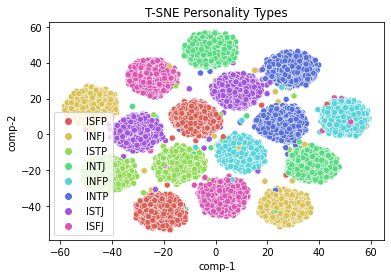

In [28]:
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", df.y.nunique()),
                data=df).set(title="T-SNE Personality Types") 
plt.show()

In [12]:
## two clusters per type is unexpected; investigating
## solutions attempted:
## minmax scaling the data
## changing init parameter to 'pca', from 'random'
## using higher / lower perplexity parameter